In [1]:
###################### Data Manipulation ####################

import pandas as pd
import numpy as np

###################### Data Visualization ###################

import seaborn as sns
import matplotlib.pyplot as plt

###################### Logistic Regression #################

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
################# Load Data ####################
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 1000
Survey = pd.read_csv(r"C:\Users\kseni\Documents\Dataset\brfss_for_bda_2021.csv", encoding='cp1252',low_memory=False)
print(Survey.columns)

Index(['_STATE', '_GEOSTR', '_DENSTR2', 'PRECALL', 'SECSCRFL', 'REPNUM',
       'REPDEPTH', 'FMONTH', 'IDATE', 'IMONTH',
       ...
       'PPS_45', 'PPS_46', 'PPS_48', 'PPS_52', 'childage', 'cracorg1',
       '_prace1', 'mracasc1', '_impcty', 'mracorg1'],
      dtype='object', length=414)


In [3]:
#2) 2)	Do the behavioural factors such as alcohol intake, Tobacco intake, level of Physical Activities 
# of a person and socioeconomic factors such as education, Income and gender of a person in US impact on their overall health? 

# DRNKANY5 - Calculated variable for adults who reported having had at least one drink of alcohol in the past 30 days
# DROCDY3_ - Calculated variable for drink-occasions-per-day
# _RFBING5 - Calculated variable for binge drinkers 
# _DRNKWEK - Calculated variable for calculated total number of alcoholic beverages consumed per week
# _RFDRHV5 - Calculated variable for heavy drinkers
# _SMOKER3 - Calculated variable for four-level smoker status
# _RFSMOK3 - Calculated variable for adults who are current smokers
# _TOTINDA - LEISURE TIME PHYSICAL ACTIVITY CALCULATED VARIABLE
# _EDUCAG -  Calculated variable for level of education completed
# _INCOMG -  Income Category
# SEX - Gender


RQ2 = Survey[['_RFHLTH', '_RFBING5', '_RFDRHV5','_SMOKER3', '_RFSMOK3', '_EDUCAG' , '_INCOMG' , '_TOTINDA' , 'SEX']]

RQ2 = RQ2.rename({'_RFHLTH': 'Overall_Health', '_RFBING5': 'Binge Drinkers', '_RFDRHV5': 'Heavy Drinkers','_SMOKER3': 'Smoker Status','_RFSMOK3': 'Current Smokers','_EDUCAG': 'Education level','_INCOMG': 'Income level','_TOTINDA': 'Leisure time physical Activity' , 'SEX':'Gender'}, axis=1)

#Writing a dataframe to excel
datatoexcel = pd.ExcelWriter(r'C:\Users\kseni\Documents\Dataset\Q2.xlsx')
  
# write DataFrame to excel
RQ2.to_excel(datatoexcel)
  
# save the excel
datatoexcel.save()
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [5]:
#HeartDiseaseDataset.info()
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

for col in RQ2:
    if (is_string_dtype(RQ2[col])):
        print(RQ2[col].name)
        print(RQ2[col].unique())
        RQ2[col][RQ2[col].str.contains('Missing|Not Sure|Refused')] = np.nan
        print(RQ2[col].unique())
        
    else:
        RQ2.loc[RQ2[col] == 99900, col] = np.nan        
        if (RQ2[col].name == 'Heavy Drinkers'):
            print(RQ2[col].name)
            RQ2.loc[RQ2[col] == 9, col] = np.nan
            print(RQ2[col].unique())    

RQ2.info()

Overall_Health
['Good or Better Health' 'Fair or Poor Health'
 "Don't know/Not Sure Or Refused/Missing"]
['Good or Better Health' 'Fair or Poor Health' nan]
Binge Drinkers
['Yes' 'No' "Don't know/Refused/Missing"]
['Yes' 'No' nan]
Heavy Drinkers
[ 1.  2. nan]
Smoker Status
['Never smoked' 'Current smoker - now smokes some days' 'Former smoker'
 "Don't know/Refused/Missing" 'Current smoker - now smokes every day']
['Never smoked' 'Current smoker - now smokes some days' 'Former smoker'
 nan 'Current smoker - now smokes every day']
Current Smokers
['No' 'Yes' "Don't know/Refused/Missing"]
['No' 'Yes' nan]
Education level
['Graduated from College or Technical School'
 'Attended College or Technical School' 'Graduated High School'
 "Don't know/Not sure/Missing" 'Did not graduate High School']
['Graduated from College or Technical School'
 'Attended College or Technical School' 'Graduated High School' nan
 'Did not graduate High School']
Income level
['$50,000 or more' "Don't know/Not sure/M

<ipython-input-5-a4e0d950b635>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RQ2[col][RQ2[col].str.contains('Missing|Not Sure|Refused')] = np.nan
<ipython-input-5-a4e0d950b635>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RQ2[col][RQ2[col].str.contains('Missing|Not Sure|Refused')] = np.nan


Overall_Health                      65
Binge Drinkers                     953
Heavy Drinkers                     942
Smoker Status                      672
Current Smokers                    672
Education level                     92
Income level                      1997
Leisure time physical Activity    1383
Gender                               0
dtype: int64


<AxesSubplot:>

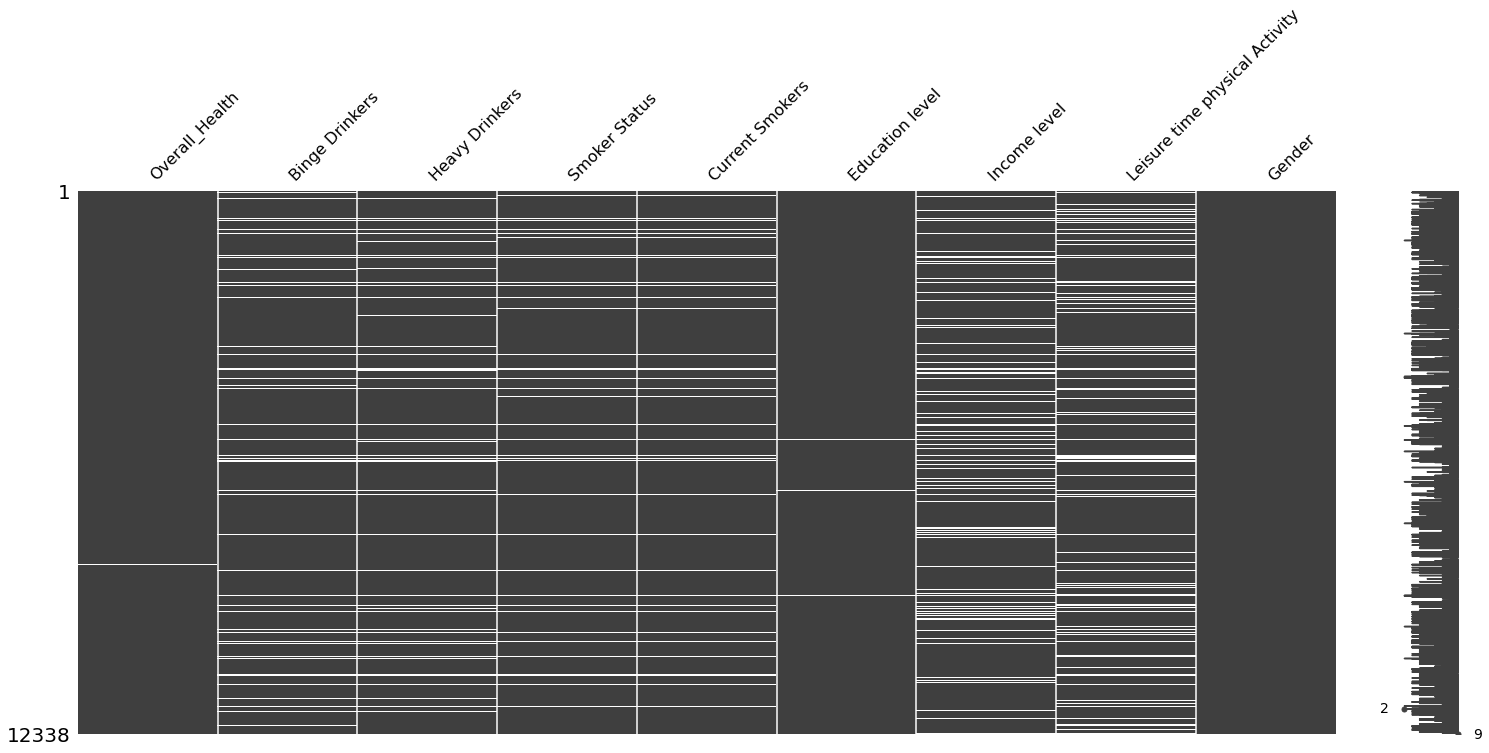

In [6]:
print(RQ2.isnull().sum())

import missingno as msno
msno.matrix(RQ2)

In [7]:
# Removing the rows which its class variable contains null values
RQ2 = RQ2[RQ2['Overall_Health'].notna()]

#Imputing missing values.

for col in RQ2:
    if (is_string_dtype(RQ2[col])):
        #Replace missing values from the mode in categorical variables
        RQ2[col].fillna(RQ2[col].mode()[0], inplace=True)
    else:
        #Replace missing values from interpolate method
        RQ2[col].interpolate(method='linear', direction = 'forward', inplace=True) 
        
print(RQ2.isnull().sum())

Overall_Health                    0
Binge Drinkers                    0
Heavy Drinkers                    0
Smoker Status                     0
Current Smokers                   0
Education level                   0
Income level                      0
Leisure time physical Activity    0
Gender                            0
dtype: int64


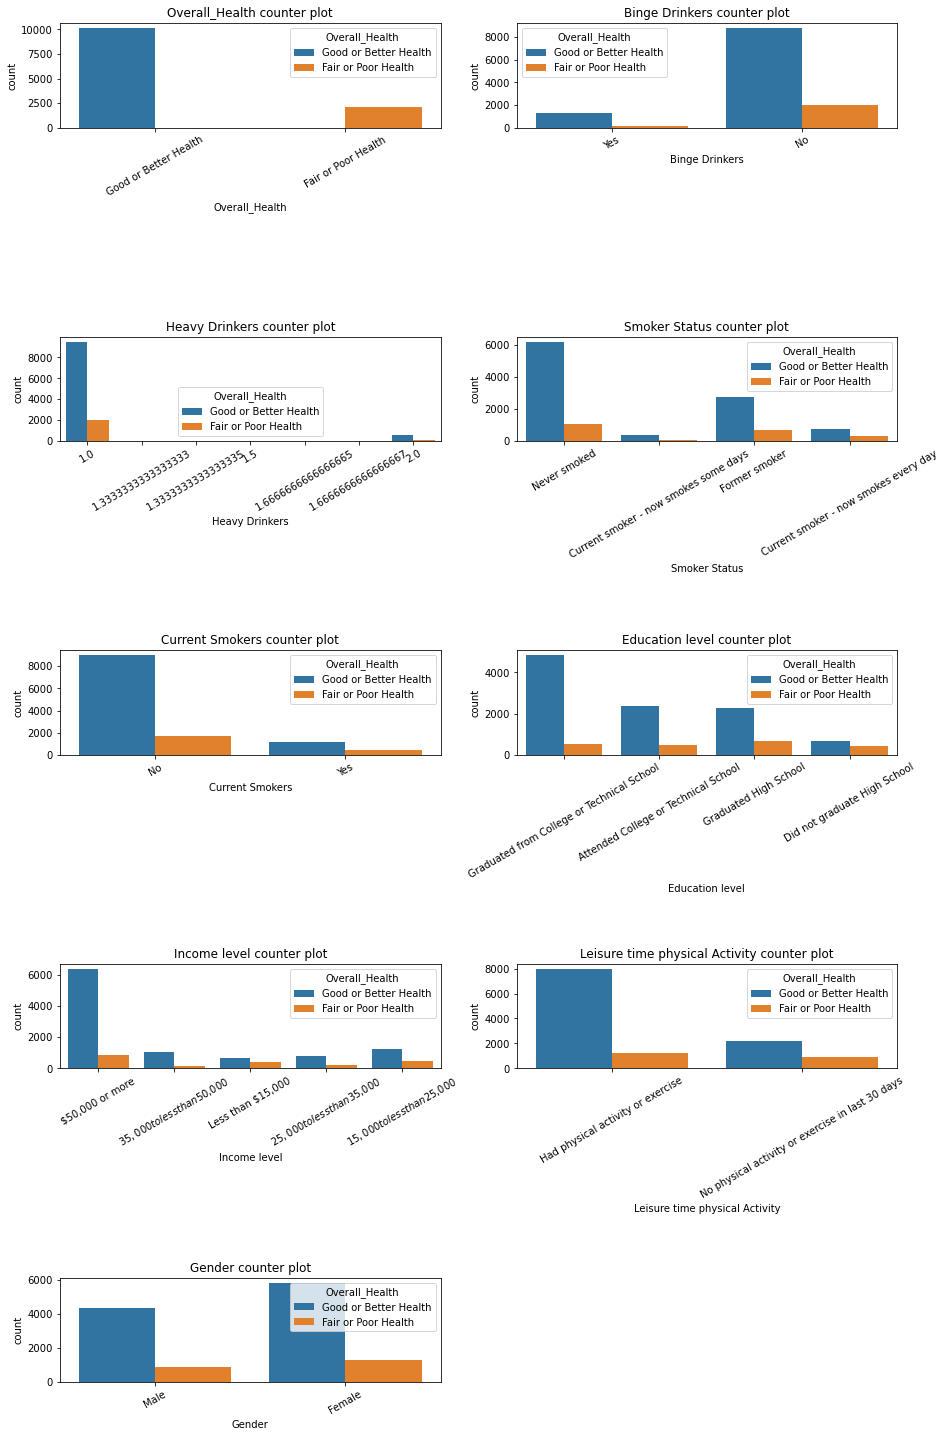

In [8]:


#  Categorical Data
a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,25))
plt.subplots_adjust(hspace = 2)

for col in RQ2:
    #if (is_string_dtype(RQ2[col])):
        plt.subplot(a, b, c)
        plt.title('{} counter plot'.format(RQ2[col].name))
        plt.xlabel(RQ2[col].name)
        #Replace missing values from the mode in categorical variables
        g=sns.countplot(x=RQ2[col], data=RQ2, hue='Overall_Health')
        g.tick_params(axis='x', rotation=30)
        c = c + 1
        
plt.show()


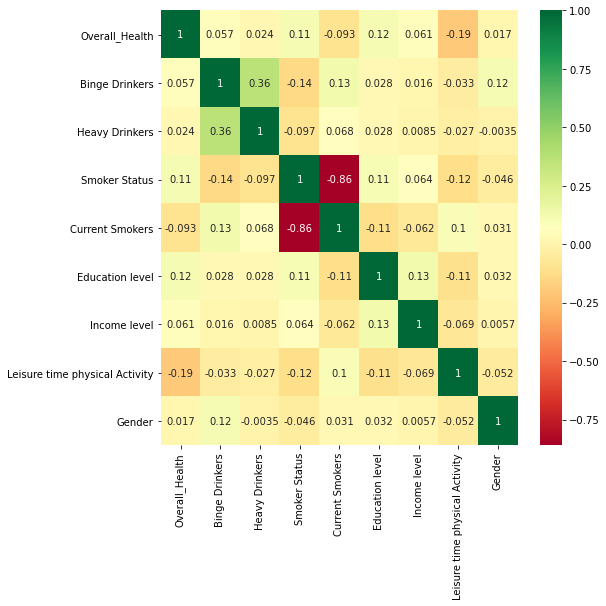

In [9]:
RQ2.describe()

#Our dataset consists of categorical as well as numerical variables. To fit the categorical data into the model lets encode the categorical variables
import category_encoders as ce

RQ2_cat = RQ2

#Using the label encoding approach

# Searching the unique values of categorical variables to encode them using label encoding approach
for col in RQ2:
    if (is_string_dtype(RQ2[col])):
        RQ2_cat[col] = RQ2[col].astype('category')
        RQ2_cat[col] = RQ2_cat[col].cat.codes

#Feature selection
#Correlation Matrix with Heatmap

#get correlations of each features in dataset
corrmat = RQ2_cat.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(RQ2_cat[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [10]:
RQ2=RQ2.drop(['Current Smokers'], axis=1)

import statsmodels.api as sm

X = RQ2.iloc[:, 1:14]
y = RQ2['Overall_Health']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.434911
         Iterations 6
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.059      
Dependent Variable:      Overall_Health       AIC:                  10689.3219 
Date:                    2021-09-19 10:55     BIC:                  10741.2280 
No. Observations:        12273                Log-Likelihood:       -5337.7    
Df Model:                6                    LL-Null:              -5673.0    
Df Residuals:            12266                LLR p-value:          1.2860e-141
Converged:               1.0000               Scale:                1.0000     
No. Iterations:          6.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------